In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
train=pd.read_csv("/home/siddhartha/Documents/ML_problem_statements/intracity_fare_estimation_problem/intracity_fare_train.csv")

In [99]:
test=pd.read_csv("/home/siddhartha/Documents/ML_problem_statements/intracity_fare_estimation_problem/intracity_fare_test.csv")

In [100]:
d={'Bus':0,'bus':0,'Metro':1,'metro':1,'Taxi AC':2,'taxi ac':2,'Taxi Non AC':3,'Taxi non Ac':3,'taxi Non Ac':3,'taxi non Ac':3,'Taxi non ac':3,'AC bus':4,'Ac Bus':4,'ac bus':4,'AC bus':4,'AC Bus':4,'taxi Non ac':5,'taxi non ac':5,'AUTO RICKSHAW':6,'auto rickshaw':6,'Auto Rickshaw':6,'Auto rickshaw':6,'mini bus':7,'Mini bus':7,'Mini Bus':7,'mini Bus':7}
train['VEHICLE_TYPE']=train['VEHICLE_TYPE'].apply(lambda x: d[x])
features=['ID','TIMESTAMP','STARTING_LATITUDE','STARTING_LONGITUDE','DESTINATION_LONGITUDE','DESTINATION_LATITUDE','VEHICLE_TYPE','TOTAL_LUGGAGE_WEIGHT','WAIT_TIME','TRAFFIC_STUCK_TIME','DISTANCE']
#train_X = train[features]# taking the training data features
#train_Y = train.FARE# output of our training data

In [101]:
a=train.loc[(train['VEHICLE_TYPE']==0)&(train['DISTANCE']!=0),['FARE','DISTANCE']]
b0=a['FARE']/a['DISTANCE']
bm0=b0.mean()

a=train.loc[(train['VEHICLE_TYPE']==1)&(train['DISTANCE']!=0),['FARE','DISTANCE']]
b1=a['FARE']/a['DISTANCE']
bm1=b1.mean()

a=train.loc[(train['VEHICLE_TYPE']==2)&(train['DISTANCE']!=0),['FARE','DISTANCE']]
b2=a['FARE']/a['DISTANCE']
bm2=b2.mean()

a=train.loc[(train['VEHICLE_TYPE']==3)&(train['DISTANCE']!=0),['FARE','DISTANCE']]
b3=a['FARE']/a['DISTANCE']
bm3=b3.mean()

a=train.loc[(train['VEHICLE_TYPE']==4)&(train['DISTANCE']!=0),['FARE','DISTANCE']]
b4=a['FARE']/a['DISTANCE']
bm4=b4.mean()

a=train.loc[(train['VEHICLE_TYPE']==5)&(train['DISTANCE']!=0),['FARE','DISTANCE']]
b5=a['FARE']/a['DISTANCE']
bm5=b5.mean()

a=train.loc[(train['VEHICLE_TYPE']==6)&(train['DISTANCE']!=0),['FARE','DISTANCE']]
b6=a['FARE']/a['DISTANCE']
bm6=b6.mean()

a=train.loc[(train['VEHICLE_TYPE']==7)&(train['DISTANCE']!=0),['FARE','DISTANCE']]
b7=a['FARE']/a['DISTANCE']
bm7=b7.mean()

In [102]:
train=pd.read_csv("/home/siddhartha/Documents/ML_problem_statements/intracity_fare_estimation_problem/intracity_fare_train.csv")


d={'Bus':bm0,'bus':bm0,'Metro':bm1,'metro':bm1,'Taxi AC':bm2,'taxi ac':bm2,'Taxi Non AC':bm3,'Taxi non Ac':bm3,'taxi Non Ac':bm3,'taxi non Ac':bm3,'Taxi non ac':bm3,'AC bus':bm4,'Ac Bus':bm4,'ac bus':bm4,'AC bus':bm4,'AC Bus':bm4,'taxi Non ac':bm5,'taxi non ac':bm5,'AUTO RICKSHAW':bm6,'auto rickshaw':bm6,'Auto Rickshaw':bm6,'Auto rickshaw':bm6,'mini bus':bm7,'Mini bus':bm7,'Mini Bus':bm7,'mini Bus':bm7}
train['VEHICLE_TYPE']=train['VEHICLE_TYPE'].apply(lambda x: d[x])
features=['ID','TIMESTAMP','STARTING_LATITUDE','STARTING_LONGITUDE','DESTINATION_LONGITUDE','DESTINATION_LATITUDE','VEHICLE_TYPE','TOTAL_LUGGAGE_WEIGHT','WAIT_TIME','TRAFFIC_STUCK_TIME','DISTANCE']
#train_X = train[features]# taking the training data features
#train_Y = train.FARE

In [103]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression# for Logistic Regression algorithm
from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.ensemble import RandomForestClassifier # A combine model of many decision trees
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [104]:
train.fillna(0, inplace=True)
#train.fillna(train.mean(), inplace=True)

In [105]:
train.describe()

,ID,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,19.432683,77.101083,19.462381,77.148126,9.194193,4.362300,2.664050,30.066750,30.543050,251.926063
std,5773.647028,6.849987,15.206085,6.837639,15.089329,7.932151,8.309001,5.240941,21.951902,12.123407,300.067490
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.793960,0.000000,0.000000,0.000000,0.000000,7.000000
25%,5000.750000,13.062916,77.048791,13.065399,77.043253,2.328407,0.000000,0.000000,12.000000,22.000000,42.097500
50%,10000.500000,19.206403,77.680915,19.210783,77.683037,3.174379,0.000000,0.000000,26.000000,31.000000,75.330000
75%,15000.250000,25.309045,82.986794,25.310355,82.985936,18.564294,4.000000,2.000000,45.000000,40.000000,416.130000
max,20000.000000,28.770716,88.452179,28.770713,88.452149,21.012052,30.000000,19.000000,95.000000,99.000000,1972.000000


In [106]:
import datetime as dt
train['TIMESTAMP'] = pd.to_datetime(train['TIMESTAMP'])
train['TIMESTAMP2']=(train['TIMESTAMP'].map(dt.datetime.toordinal))%7
train['TIMESTAMP3']=train['TIMESTAMP'].map(dt.datetime.toordinal)

In [107]:
train

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,TIMESTAMP2,TIMESTAMP3
0,1,2016-01-21 06:59:49,13.044677,80.235723,13.178228,80.163277,2.328407,0.0,0.0,8,34,32.09,4,735984
1,2,2016-06-17 22:23:30,28.639580,77.074113,28.587288,76.971306,21.012052,7.0,9.0,66,34,985.99,5,736132
2,3,2016-03-16 04:55:18,25.373881,82.969570,25.349656,82.992587,18.564294,18.0,6.0,53,1,1085.33,3,736039
3,4,2016-04-26 18:10:09,0.000000,0.000000,28.758384,77.011422,1.793960,0.0,0.0,54,31,56.21,2,736080
4,5,2016-06-22 01:51:35,22.543506,88.446273,22.706696,88.429522,2.328407,0.0,0.0,33,44,30.62,3,736137
5,6,2016-03-18 15:57:21,19.206757,72.882636,19.230355,72.838503,3.174379,0.0,0.0,23,43,59.82,5,736041
6,7,2015-11-04 16:26:53,19.012727,72.872332,19.147118,72.841727,19.437570,22.0,0.0,61,34,586.36,3,735906
7,8,2015-11-05 08:51:13,12.944421,77.645893,12.877228,77.694882,2.328407,0.0,0.0,28,18,32.27,4,735907
8,9,2016-08-15 14:41:00,25.304677,82.987010,25.387941,82.990020,21.012052,12.0,18.0,69,43,1122.08,1,736191
9,10,2015-01-23 09:36:02,22.537007,88.447269,22.578402,88.404477,1.793960,0.0,0.0,17,19,23.54,5,735621


In [108]:
train.dtypes

ID                                int64
TIMESTAMP                datetime64[ns]
STARTING_LATITUDE               float64
STARTING_LONGITUDE              float64
DESTINATION_LATITUDE            float64
DESTINATION_LONGITUDE           float64
VEHICLE_TYPE                    float64
TOTAL_LUGGAGE_WEIGHT            float64
WAIT_TIME                       float64
TRAFFIC_STUCK_TIME                int64
DISTANCE                          int64
FARE                            float64
TIMESTAMP2                        int64
TIMESTAMP3                        int64
dtype: object

In [109]:
X = train[['ID','TIMESTAMP2','TIMESTAMP3','STARTING_LATITUDE','STARTING_LONGITUDE','DESTINATION_LONGITUDE','DESTINATION_LATITUDE','VEHICLE_TYPE','TOTAL_LUGGAGE_WEIGHT','DISTANCE','TRAFFIC_STUCK_TIME','FARE']]
Y = train['FARE']

In [110]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)

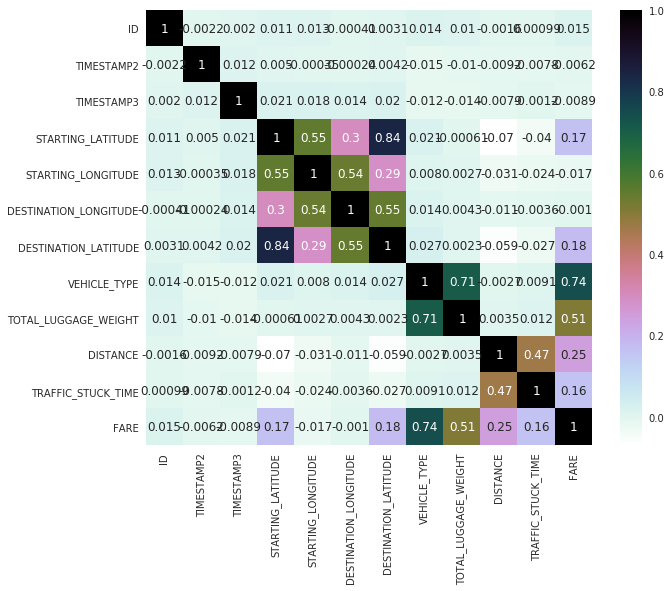

In [111]:
plt.figure(figsize=(10,8)) 
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [112]:
train1, test1 = train_test_split(train, test_size = 0.25, random_state=1212)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train1.shape)
print(test1.shape)

(15000, 14)
(5000, 14)


In [113]:
features=['TIMESTAMP2','STARTING_LATITUDE','STARTING_LONGITUDE','VEHICLE_TYPE','TOTAL_LUGGAGE_WEIGHT','DISTANCE','TRAFFIC_STUCK_TIME']
#features=['TIMESTAMP2','TIMESTAMP3','STARTING_LATITUDE','STARTING_LONGITUDE','VEHICLE_TYPE','TOTAL_LUGGAGE_WEIGHT','DISTANCE','TRAFFIC_STUCK_TIME']
features2=['VEHICLE_TYPE','DISTANCE','TRAFFIC_STUCK_TIME']
features3=['VEHICLE_TYPE','DISTANCE']
features4=['VEHICLE_TYPE','TRAFFIC_STUCK_TIME']

In [114]:
train_X = train1[features]# taking the training data features
train_y = train1.FARE# output of our training data
test_X = test1[features] # taking test data features
test_y = test1.FARE   #output value of test data

In [115]:
scaler = StandardScaler()
# Don't cheat - fit only on training data
scaler.fit(train_X)  
train_X = scaler.transform(train_X)  
# apply same transformation to test data
test_X = scaler.transform(test_X)

In [116]:
model = LinearRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.r2_score(test_y,prediction)

0.66281056099484159

In [117]:
model = RandomForestRegressor()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.r2_score(test_y,prediction)

0.80056868246264545

In [118]:
model = GradientBoostingRegressor()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.r2_score(test_y,prediction)

0.83294619475705056

In [119]:
model = AdaBoostRegressor()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
metrics.r2_score(test_y,prediction)

0.64672541176430354

In [120]:
clf = MLPRegressor()#hidden_layer_sizes=(10,),max_iter=1000,random_state=1)
clf.fit(train_X,train_y)
prediction = clf.predict(test_X)
metrics.r2_score(test_y,prediction)

0.80095770600293126